In [4]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import (
precision_score,
accuracy_score,
recall_score,
f1_score)
from sklearn.model_selection import GridSearchCV

### Load Dataset

In [5]:
df = pd.read_csv("Loan_Modelling.csv")

### Data Exploration

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIPCode             5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal_Loan       5000 non-null   int64  
 10  Securities_Account  5000 non-null   int64  
 11  CD_Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [7]:
# check for decriptive statistics
df.describe()

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.104600,73.774200,93169.257000,2.396400,1.937938,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,1443.520003,11.463166,11.467954,46.033729,1759.455086,1.147663,1.747659,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,1.000000,23.000000,-3.000000,8.000000,90005.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1250.750000,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


- The total number of rows (customers) is 5000
- The minimum age of the customers is 23 while the maximum age is 67, average age of the customers
  is 45

In [8]:
df["Experience"].nunique()

47

In [9]:
# check for dupliate values
df.duplicated().sum()

0

In [10]:
df.isnull().sum()

ID                    0
Age                   0
Experience            0
Income                0
ZIPCode               0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal_Loan         0
Securities_Account    0
CD_Account            0
Online                0
CreditCard            0
dtype: int64

In [11]:
df['Education'].unique()

array([1, 2, 3], dtype=int64)

In [12]:
df.sample(5)

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
1925,1926,43,19,81,90245,1,0.3,1,218,0,0,0,1,0
2110,2111,28,4,104,94301,3,2.5,1,0,0,0,0,0,0
2300,2301,66,41,70,93711,3,2.2,1,0,0,0,0,0,0
3395,3396,41,16,35,94061,2,1.4,2,135,0,0,0,0,0
2276,2277,29,3,172,92093,4,4.4,1,0,1,0,0,0,0


In [13]:
# df['Mortgage'].unique()

### Data Processing

- Categorical variables already encoded 

### Visualization

In [14]:
from utils import histogram_boxplot, labeled_barplots, custom_scatterplot

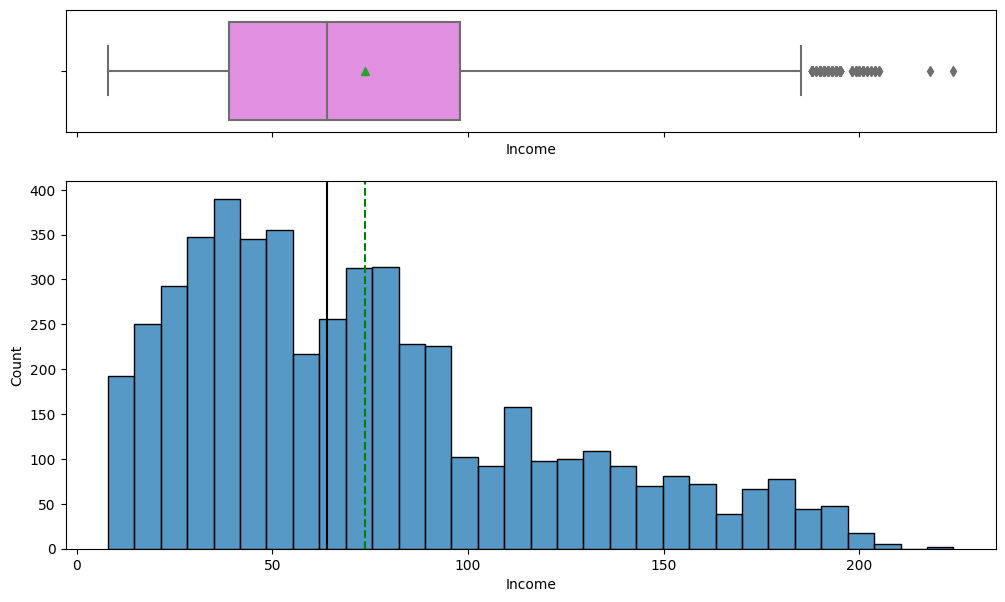

In [15]:
histogram_boxplot(data = df, feature="Income")

- This plot is skewd to the right.
- It shows that, majority of the customers have lower income, while smaller number of the
  liability customers have higher income

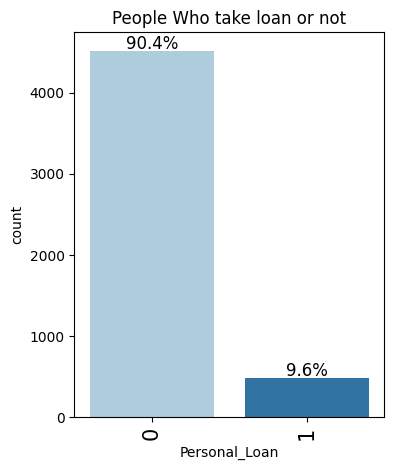

In [16]:
labeled_barplots(df, "Personal_Loan", title="People Who take loan or not", n=3, perc=True)

- This is an inballance data

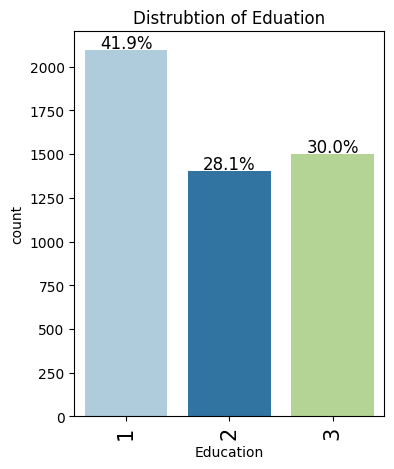

In [17]:
labeled_barplots(df, "Education", title="Distrubtion of Eduation", n=3, perc=True)

- Most of the liability customers are undergraduate

In [18]:
df.columns

Index(['ID', 'Age', 'Experience', 'Income', 'ZIPCode', 'Family', 'CCAvg',
       'Education', 'Mortgage', 'Personal_Loan', 'Securities_Account',
       'CD_Account', 'Online', 'CreditCard'],
      dtype='object')

In [19]:
# custom_scatterplot(x="CreditCard", y="Personal_Loan", title="Income against Age", data=df)

Text(0.5, 1.0, 'Correlation')

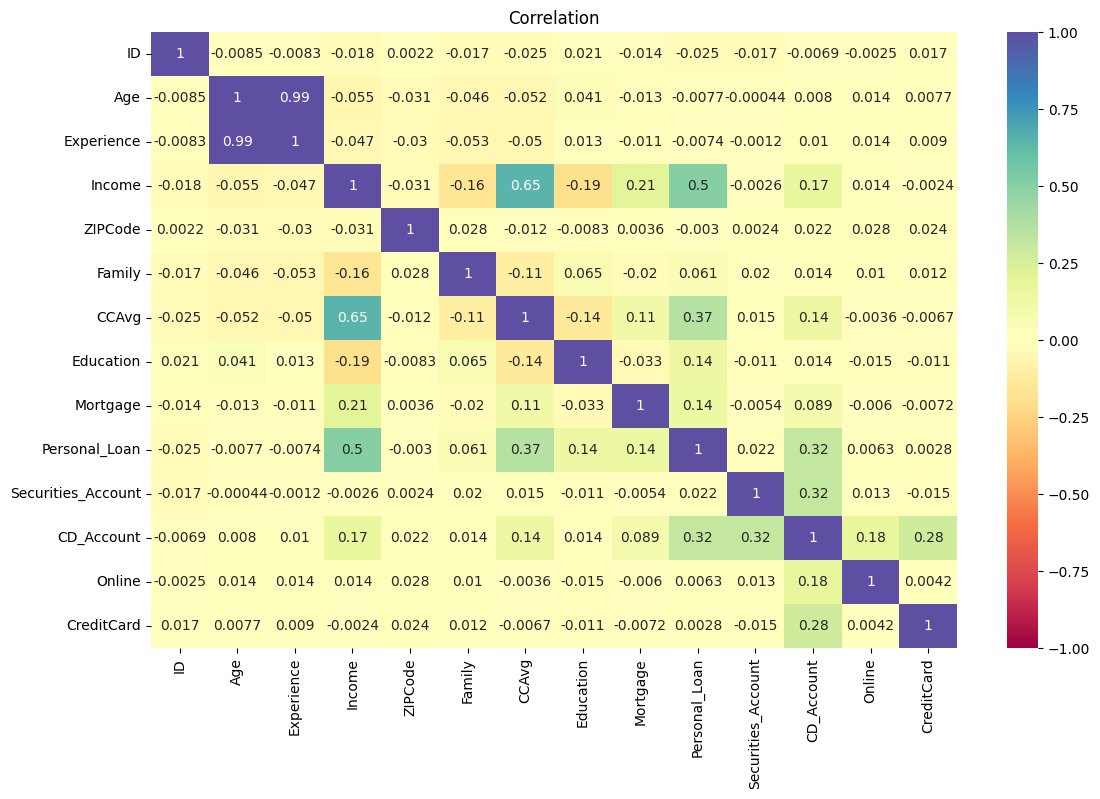

In [20]:
num_data = df.select_dtypes(include="number")
correlation = num_data.corr()

plt.figure(figsize = (13,8))
sns.heatmap(data = correlation, annot=True, vmax= 1, vmin= -1, cmap="Spectral")
plt.title("Correlation")

- The target here is Personal Loan and there are no much correlation from other variables according
  to this heatmap but there are surely multi-culiarity betwen two or more independent variables as seen in this plot

In [21]:
df.describe()

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.104600,73.774200,93169.257000,2.396400,1.937938,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,1443.520003,11.463166,11.467954,46.033729,1759.455086,1.147663,1.747659,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,1.000000,23.000000,-3.000000,8.000000,90005.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1250.750000,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


In [22]:
from sklearn.impute import SimpleImputer

### Split the data

In [23]:
# selet features and tagert
X = df.drop("Personal_Loan", axis=1)
y = df["Personal_Loan"]

In [24]:
# split into trai and test sets
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y)

In [25]:
# imp = SimpleImputer(missing_values=0, strategy="median")

# cols = list(X[["Mortgage", "Securities_Account", "CD_Account", "Online", "CreditCard"]].columns)
# x_train[cols] = imp.fit_transform(x_train[cols])
# x_test[cols] = imp.transform(x_train[cols])

In [26]:
y_train.value_counts(normalize=True)

0    0.904
1    0.096
Name: Personal_Loan, dtype: float64

In [27]:
# this is the work of the stratify, it is to maintain same proportion in bith the 
# training and testing
y_test.value_counts(normalize=True)

0    0.904
1    0.096
Name: Personal_Loan, dtype: float64

### Building The Logistic Regression Model

In [28]:
from sklearn.linear_model import LogisticRegression
from utils import model_performance_classification
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [29]:
#create an instance of the scaler
scaler = MinMaxScaler()
# scale the data
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [30]:
# create an instance of Logistic Regression
log_reg = LogisticRegression(random_state=0, class_weight={1:0.9, 0:0.1})
log_reg.fit(x_train_scaled, y_train)

LogisticRegression(class_weight={0: 0.1, 1: 0.9}, random_state=0)

In [31]:
# log_reg.score(x_train_scaled, y_train)

In [32]:
# log_reg.predict_proba(x_test_scaled)

### Checking Model Performance

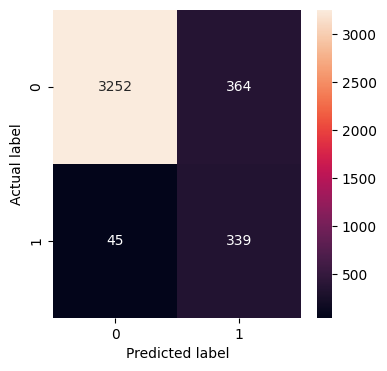

,Accuracy,Recall,Precision,F1-score
0,0.89775,0.882812,0.482219,0.623735


In [33]:
log_reg_train = model_performance_classification(log_reg, x_train_scaled, y_train)
log_reg_train

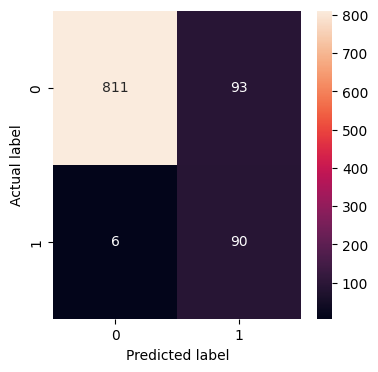

,Accuracy,Recall,Precision,F1-score
0,0.901,0.9375,0.491803,0.645161


In [34]:
log_reg_test = model_performance_classification(log_reg, x_test_scaled, y_test)
log_reg_test

- According to this Logistic regression model with class weight of 10% and 90% and random_state of 0 respectively, the model shows a reasonably better overall performance in predicting the 
  the potential loan buyers, with high accuracy, recall and F1-score, it shows it is effective 
  in identifying customers likely to purchase a personal loan, both in the training and test sets,
  however, the precision is low which needs to be improved on to minimize the false positive 
  (customers who did not buy but the model predicted that they bought) to make a more better model

### Improving the Model

- Hyperparameter tuning

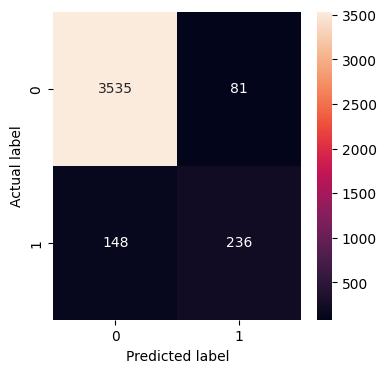

,Accuracy,Recall,Precision,F1-score
0,0.94275,0.614583,0.744479,0.673324


In [35]:
# by changing the threshold parameter
log_reg_two_train = model_performance_classification(log_reg, x_train_scaled, y_train, \
                                                     threshold=0.8)
log_reg_two_train

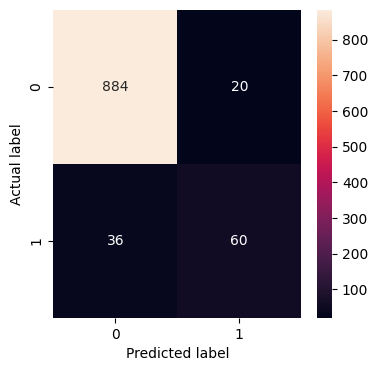

,Accuracy,Recall,Precision,F1-score
0,0.944,0.625,0.75,0.681818


In [36]:
log_reg_two_test = model_performance_classification(log_reg, x_test_scaled, y_test, \
                                                     threshold=0.8)
log_reg_two_test

- Precision is the most important metrics to focus on here because we are trying to predict  wether the liability customers will buy a personal loan or not because it measure the proportion of correctly predited positive instances (customers who buy a personal loan) out of all the  instances predicted as positive.
- After increasing the threshold to 0.8, the model improved a little bit with precision of about  75% in training sets and about 76% in the test sets with accuracy of around 94% in the training sets and 95% in the test sets.
- If the precision increases, the false positive can be minimized, that means redusing the number of customers wrongly identified as potentian loan buyers and this is important in target marketinig because it will not make the bank to waste money on customers who are less likely to buy personal loan. Instead the marketing department will identify the potential customers who have a higher probability of  purchasing the loan, increasing the efficiancy of marketing campaign and boosting the success ratio of loan conversion.
- Generally, the model show good performance accross multiple evaluation metrics including accuracy, recall, precision and F1-score on both the trainig and the test sets after changing threashold to 0.8, but i can still do better that is why i will use other models.

### Building Decision Tree Model

In [37]:
from sklearn.tree import DecisionTreeClassifier

In [38]:
# create an instance of the decision tree classifier
dec_tree = DecisionTreeClassifier(random_state=0)

# fit the model
dec_tree.fit(x_train, y_train) # no need to scale becasue it does not use distance function

DecisionTreeClassifier(random_state=0)

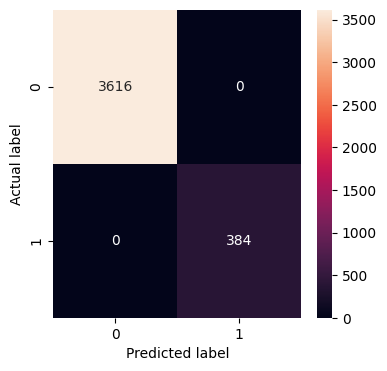

,Accuracy,Recall,Precision,F1-score
0,1.0,1.0,1.0,1.0


In [39]:
dec_tree_train = model_performance_classification(dec_tree, x_train, y_train)
dec_tree_train

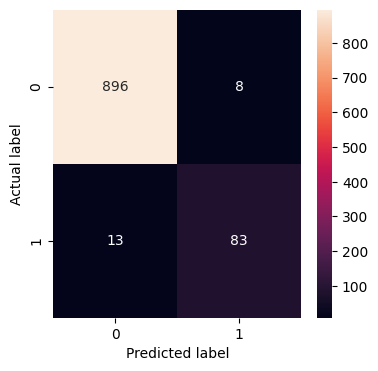

,Accuracy,Recall,Precision,F1-score
0,0.979,0.864583,0.912088,0.887701


In [40]:
dec_tree_test = model_performance_classification(dec_tree, x_test, y_test)
dec_tree_test

- This model is clearly overfitting because the data is not ballance and purely the model got to the pure lead which makes it overfit

In [41]:
y_train.value_counts(normalize=True)

0    0.904
1    0.096
Name: Personal_Loan, dtype: float64

In [42]:
import pydotplus
from IPython.display import Image

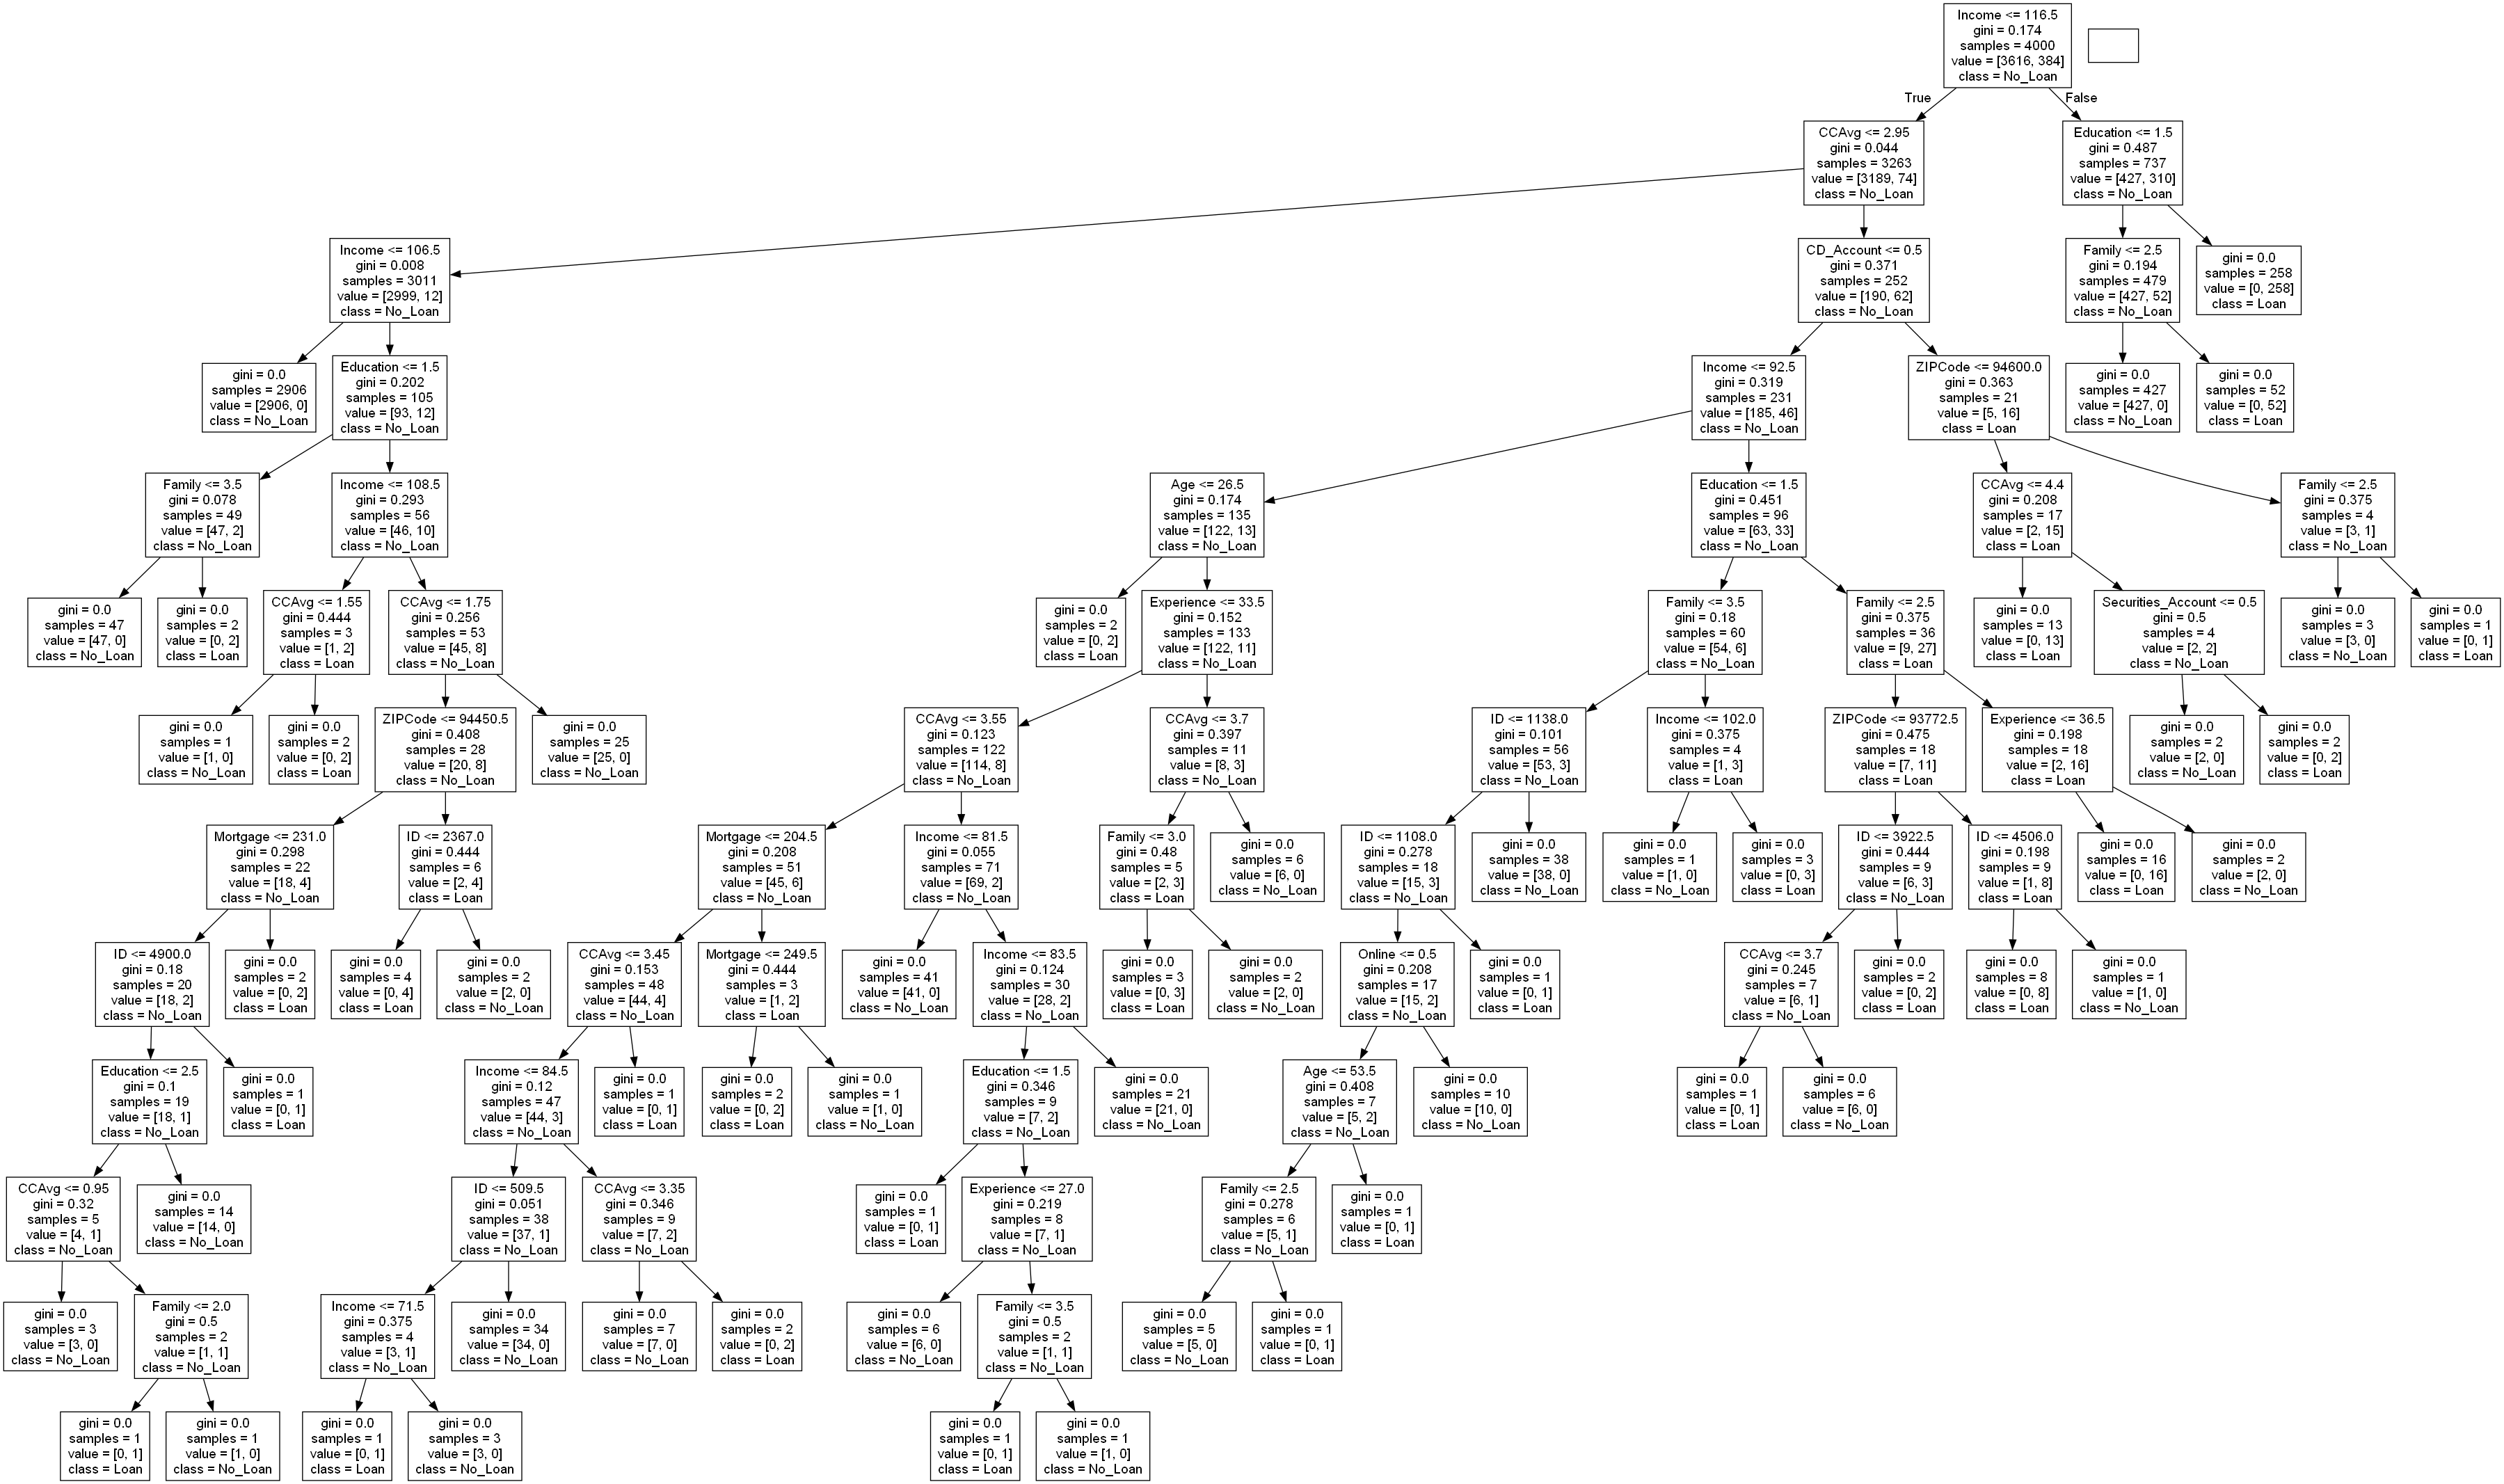

In [43]:
dot_data = tree.export_graphviz(dec_tree, out_file = None, feature_names = X.columns,
                               class_names=["No_Loan","Loan"])

# create a graph from the dot data
graph = pydotplus.graph_from_dot_data(dot_data)

# create the tree image from the graph
Image(graph.create_png())

- This tree shows a very complex model, hence why the overfitting. It made sure it got to a very  pure lead which made the model to overfit. applying some pre-prunning techiques by reducing the  max_depth can help imrove the model

In [44]:
# x_train.columns

In [45]:
# list(range(len(x_train.columns)))

In [46]:
# ind = np.argsort(fet_imp)
# ind
# range(X.shape[1])
# fet_imp

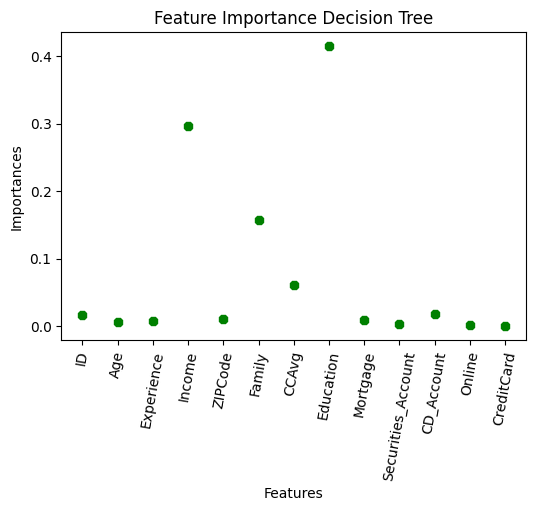

In [47]:
fet_imp = dec_tree.feature_importances_
ind = np.argsort(fet_imp)

# plot the graph
plt.figure(figsize=(6, 4))
plt.plot(dec_tree.feature_importances_, "8", color='green')
# plt.bar(x=range(len(x_train.columns)), height=fet_imp[ind], color="red", data=fet_imp)
plt.xticks(range(X.shape[1]), X.columns, rotation=80)
plt.xlabel('Features')
plt.ylabel('Importances')
plt.title('Feature Importance Decision Tree')
plt.show()

- This plot clearly shows that not all the feautrues are importand to determine the liability customers who takes loan or not. The most important feautres to focus on more are CCAvg, Family, Income and Education.

### Improving Decision Tree Model

- Ballance the dataset using SMOTE

In [48]:
from imblearn.over_sampling import SMOTE
from collections import Counter

In [49]:
# create an instance of smote
smote = SMOTE()
x_sm, y_sm = smote.fit_resample(X, y)

In [50]:
# # balanced data
# print(Counter(y_sm))
# print(Counter(x_sm))

In [51]:
# split the data on the balanced data
x_train_sm, x_test_sm, y_train_sm, y_test_sm = train_test_split(X, y, test_size=0.2, stratify=y, \
                                                               random_state=0)

In [52]:
dec_tree_2 = DecisionTreeClassifier(random_state=0, max_depth=3)

# train the model using the balanced data
dec_tree_2.fit(x_train_sm, y_train_sm)

DecisionTreeClassifier(max_depth=3, random_state=0)

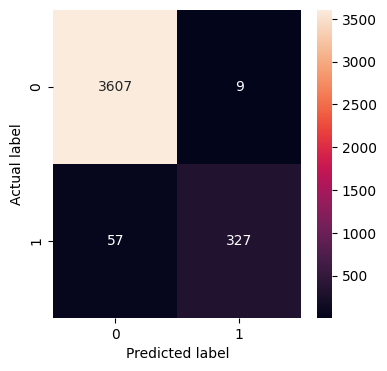

,Accuracy,Recall,Precision,F1-score
0,0.9835,0.851562,0.973214,0.908333


In [53]:
dec_tree_2_train = model_performance_classification(dec_tree_2, x_train_sm, y_train_sm)
dec_tree_2_train

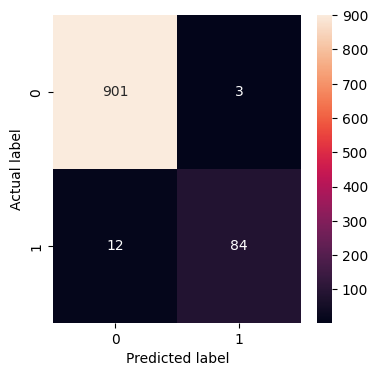

,Accuracy,Recall,Precision,F1-score
0,0.985,0.875,0.965517,0.918033


In [54]:
dec_tree_2_test = model_performance_classification(dec_tree_2, x_test_sm, y_test_sm)
dec_tree_2_test

- Overall, these results indicate that after balancing the data using SMOTE, that the model is performing well in identifying potential loan buyers. The high accuracy, recall, precision,  and F1-score in both the training and test sets demonstrate the effectiveness of the model in  predicting loan purchases, which can be valuable for the bank's marketing department in  targeting potential customers for personal loans.

#### After ballancing the model using SMOTE

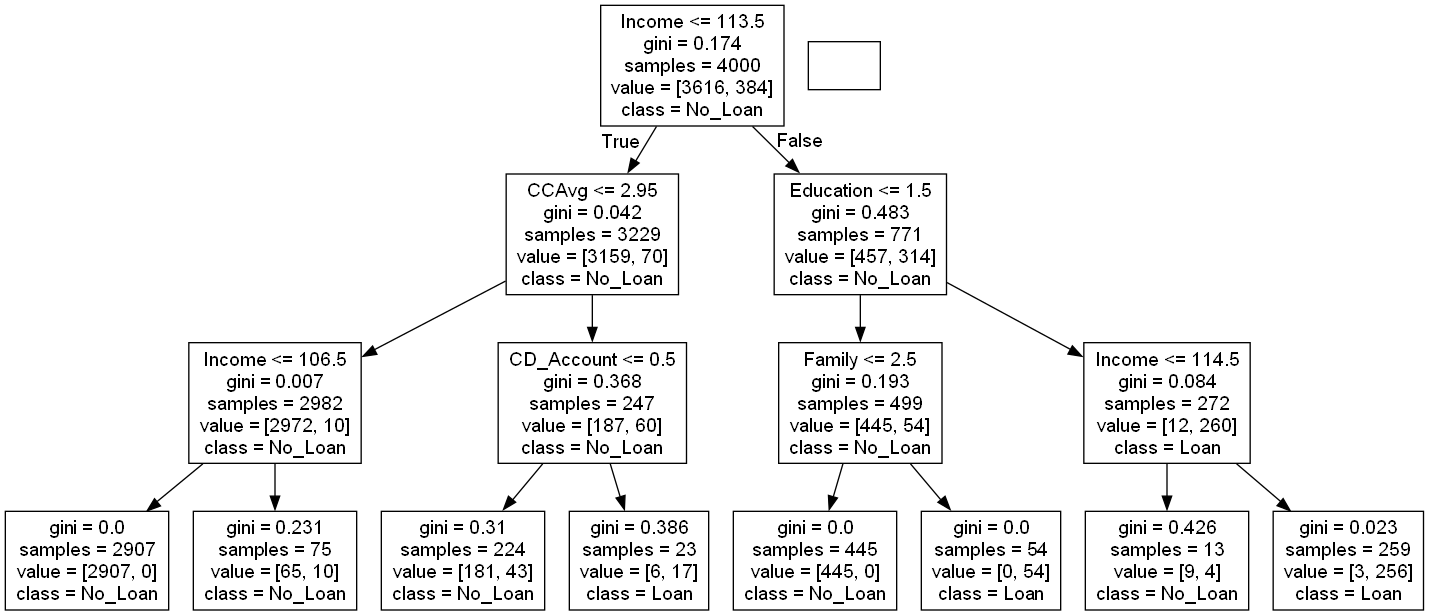

In [55]:
dot_data = tree.export_graphviz(dec_tree_2, out_file = None, feature_names = X.columns,
                               class_names=["No_Loan","Loan"])

# create a graph from the dot data
graph = pydotplus.graph_from_dot_data(dot_data)

# create the tree image from the graph
Image(graph.create_png())

### Buildiing Random Forest Model

In [56]:
# import rando forest model
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

In [57]:
# instantiate the model
rf = RandomForestClassifier(random_state=0)

In [58]:
# train the model from the balanced data
rf.fit(x_train_sm, y_train_sm)

RandomForestClassifier(random_state=0)

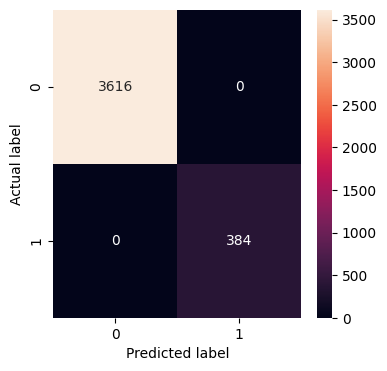

,Accuracy,Recall,Precision,F1-score
0,1.0,1.0,1.0,1.0


In [59]:
rf_train = model_performance_classification(rf, x_train_sm, y_train_sm)
rf_train

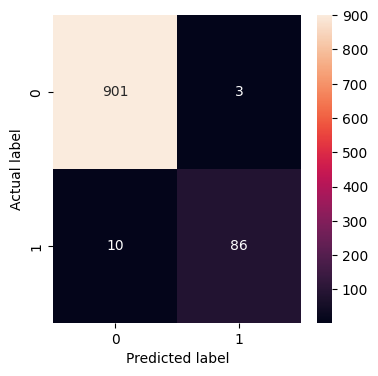

,Accuracy,Recall,Precision,F1-score
0,0.987,0.895833,0.966292,0.92973


In [60]:
rf_test = model_performance_classification(rf, x_test_sm, y_test_sm)
rf_test

- It is obvious that this model is overfitting, by getting a perfect model in the training sets  but saying otherwise in the test sets

### Improving Random Forest Model

In [61]:
# instantiate the model
rf_2 = RandomForestClassifier(random_state=0, max_depth=4)

# train the model from the balanced data
rf_2.fit(x_train_sm, y_train_sm)

RandomForestClassifier(max_depth=4, random_state=0)

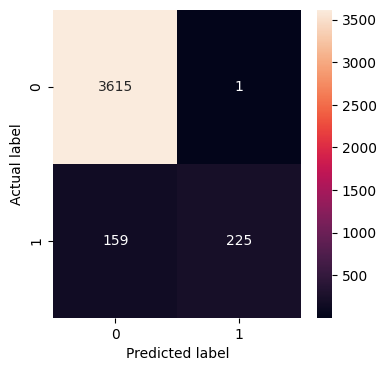

,Accuracy,Recall,Precision,F1-score
0,0.96,0.585938,0.995575,0.737705


In [62]:
rf_2_train = model_performance_classification(rf_2, x_train_sm, y_train_sm)
rf_2_train

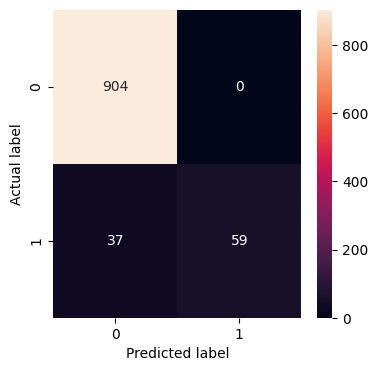

,Accuracy,Recall,Precision,F1-score
0,0.963,0.614583,1.0,0.76129


In [63]:
rf_2_test = model_performance_classification(rf_2, x_test_sm, y_test_sm)
rf_2_test

- It is obvious that this model is performing well after increasing the max_depth to 4, according to the above metrics, this is my best model among all the model i have been usiing because it got precision to be 100% in the test set which is what we are focusing on, for the model to be able  to predict customers that are likely to buy personl loan, and this model did the job perfectly.

#### Ploting the Feature Inportance of Random Forest

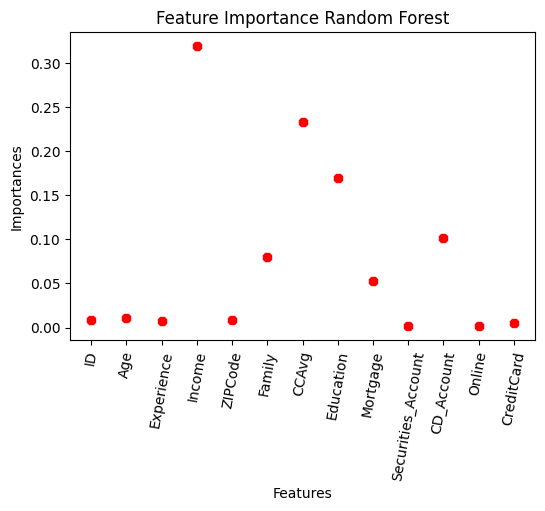

In [64]:
# plot the graph
plt.figure(figsize=(6, 4))
plt.plot(rf_2.feature_importances_, "8", color='red')
# plt.bar(x=range(len(x_train.columns)), height=fet_imp[ind], color="red", data=fet_imp)
plt.xticks(range(X.shape[1]), X.columns, rotation=80)
plt.xlabel('Features')
plt.ylabel('Importances')
plt.title('Feature Importance Random Forest')
plt.show()

- According to this plot, random forest believe alot of fatures are to determine if a liability customer will buy a personal loan, features like Income, CCAvg, Education, CD_Account, Family and  Mortgage. Compared to decision tree that mentioned few, but i observed some of the features decision tree mentioned, Random Forest also did.

### Building Gradient Boosting

In [65]:
# instantiate the model
gb = GradientBoostingClassifier(random_state=0)

# train the model
gb.fit(x_train_sm, y_train_sm)

GradientBoostingClassifier(random_state=0)

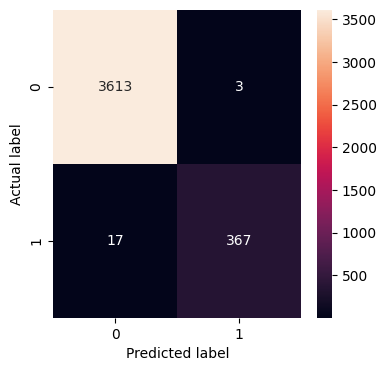

,Accuracy,Recall,Precision,F1-score
0,0.995,0.955729,0.991892,0.973475


In [66]:
gb_train = model_performance_classification(gb, x_train_sm, y_train_sm)
gb_train

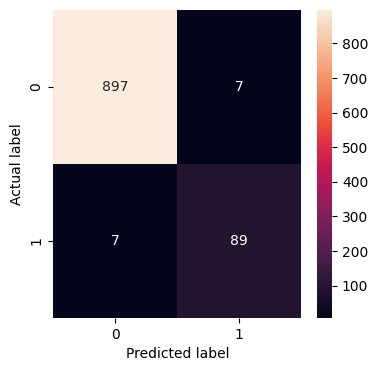

,Accuracy,Recall,Precision,F1-score
0,0.986,0.927083,0.927083,0.927083


In [67]:
gb_test = model_performance_classification(gb, x_test_sm, y_test_sm)
gb_test

- With this metrics on gradient bbosting, the model still overfit, because it perfomed almost perfect on the train sets and drop on the test sets, but all these is using the default hyperparameter which can be improved by tuning the learning rate

#### Grid Search

In [68]:
# set the parameters to tune
param_grid = {'learning_rate': [0.001, 0.01, 0.1, 1, 10],
             'max_depth': list(range(1, 5))}

# instantiate the models
gb0 = GradientBoostingClassifier(random_state=2)
grid = GridSearchCV(gb0, param_grid, cv = 5, n_jobs = -1, scoring = "precision")


# fit the grid search model on the training set
grid.fit(x_train_sm, y_train_sm)

GridSearchCV(cv=5, estimator=GradientBoostingClassifier(random_state=2),
             n_jobs=-1,
             param_grid={'learning_rate': [0.001, 0.01, 0.1, 1, 10],
                         'max_depth': [1, 2, 3, 4]},
             scoring='precision')

In [69]:
# get the best parameters
best_params = grid.best_params_
best_params

{'learning_rate': 0.01, 'max_depth': 2}

In [70]:
# get the scorer
grid.scorer_

make_scorer(precision_score, average=binary)

In [71]:
# get the best score
grid.best_score_

0.9954545454545455

### RE-Building Gradient Boosting

In [72]:
# instantiate the model
gb_1 = GradientBoostingClassifier(random_state=0, **best_params)

# train the model
gb_1.fit(x_train_sm, y_train_sm)

GradientBoostingClassifier(learning_rate=0.01, max_depth=2, random_state=0)

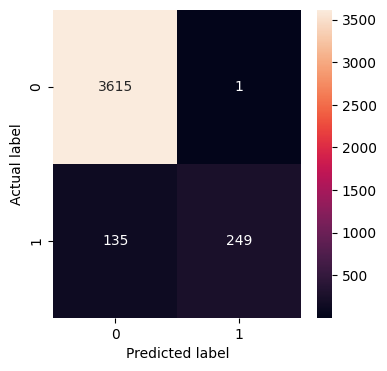

,Accuracy,Recall,Precision,F1-score
0,0.966,0.648438,0.996,0.785489


In [73]:
gb_train_1 = model_performance_classification(gb_1, x_train_sm, y_train_sm)
gb_train_1

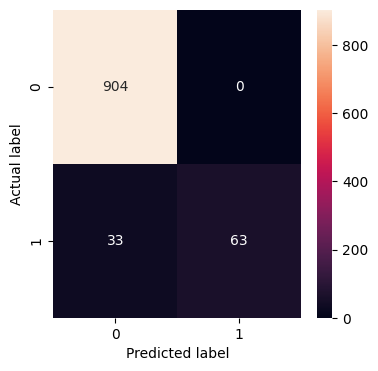

,Accuracy,Recall,Precision,F1-score
0,0.967,0.65625,1.0,0.792453


In [74]:
gb_test_1 = model_performance_classification(gb_1, x_test_sm, y_test_sm)
gb_test_1

- After setting learning rate to 0.01 and max_depth to 2, i observed that the model perfectly predict the positive class (customers who will buy personal loan) correctly, what the result according to these metrics of precision being 1.0 in the test sets, is saying is that, out of all the custmers who will buy personal loan that the model predicted, it got all correctly. Grid search helped me select the best parameter to choose to get a perfect result.

### Important Features according to Gradient Boosting

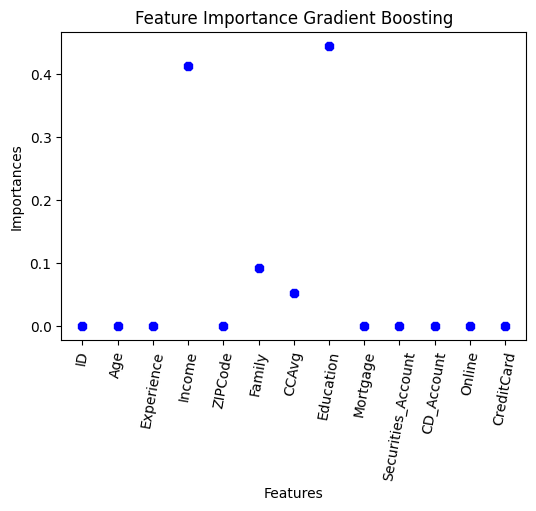

In [75]:
# plot the graph
plt.figure(figsize=(6, 4))
plt.plot(gb_1.feature_importances_, "8", color='blue')
# plt.bar(x=range(len(x_train.columns)), height=fet_imp[ind], color="red", data=fet_imp)
plt.xticks(range(X.shape[1]), X.columns, rotation=80)
plt.xlabel('Features')
plt.ylabel('Importances')
plt.title('Feature Importance Gradient Boosting')
plt.show()

- Gradient boosting still outlighted some of the features the previous model have also being  pointing out to be important, like Income, Education, Family and maybe CCAvg.

### Recommendation

- According to result of the three models built and how they selected the important features that will determine if a customer will buy a personl loan at AllLife Bank, features like Income, Education, Family and CCAvg appears in all the models built that tends to be better.

- My advice to the bank will be that if they want to determine customers that will buy loan, Income of their customers should be the best option to weigh, average spending on credit cards monthly (CCAvg) can also be looked out, and the deucational level of their customers also.